In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
movies = pd.read_csv(r"C:\Users\dhars\OneDrive\Desktop\movieLensProject\movies.csv")
ratings = pd.read_csv(r"C:\Users\dhars\OneDrive\Desktop\movieLensProject\ratings.csv")

In [46]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [47]:
movies.tail()

,movieId,title,genres
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama
10328,149532,Marco Polo: One Hundred Eyes (2015),(no genres listed)


In [48]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [49]:
movies.shape

(10329, 3)

In [50]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [51]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [52]:
movies.index

RangeIndex(start=0, stop=10329, step=1)

In [53]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [54]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [55]:
ratings.tail()

,userId,movieId,rating,timestamp
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898
105338,668,148626,4.5,1451148148


In [56]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [57]:
ratings.shape

(105339, 4)

In [58]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [59]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [60]:
ratings.index

RangeIndex(start=0, stop=105339, step=1)

In [61]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [62]:
# Total number of ratings
total_ratings = ratings.shape[0]
print(f"Total number of ratings: {total_ratings}")


Total number of ratings: 105339


In [63]:
#total number of movies
total_movies = ratings['movieId'].nunique()
print(f"Total number of movies: {total_movies}")

Total number of movies: 10325


In [64]:
#total number of users
total_users = ratings['userId'].nunique()
print(f"Total number of users: {total_users}")

Total number of users: 668


In [65]:
# Top 5 users with the most ratings
top_5_users = ratings['userId'].value_counts().head(5)
print("Top 5 users with the most ratings:")
print(top_5_users)

Top 5 users with the most ratings:
userId
668    5678
575    2837
458    2086
232    1421
310    1287
Name: count, dtype: int64


In [66]:
# Top 5 movies with the highest average rating
top_5_avg_rated_movies = ratings.groupby('movieId')['rating'].mean().nlargest(5)    
print("Top 5 movies with the highest average rating:")
print(top_5_avg_rated_movies)


Top 5 movies with the highest average rating:
movieId
124    5.0
226    5.0
418    5.0
465    5.0
567    5.0
Name: rating, dtype: float64


In [67]:
# Top 5 movies with high ratings
top_5_high_rated_movies = ratings[ratings['rating'] >= 4.5]['movieId'].value_counts().head(5)
top_5_movies = ratings_with_titles['title'].value_counts().head(5)
print("Top 5 movies:")
print(top_5_movies)

Top 5 movies:
title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: count, dtype: int64


In [68]:
# Least 5 movies with low ratings
least_5_low_rated_movies = ratings[ratings['rating'] <= 2.0]['movieId'].value_counts().head(5)
least_5_movies = ratings_with_titles['title'].value_counts().tail(5)
print("Least 5 movies:")
print(least_5_movies)

Least 5 movies:
title
Olive Kitteridge (2014)        1
Leviathan (2014)               1
Young Cassidy (1965)           1
Miss Meadows (2014)            1
Half of a Yellow Sun (2013)    1
Name: count, dtype: int64


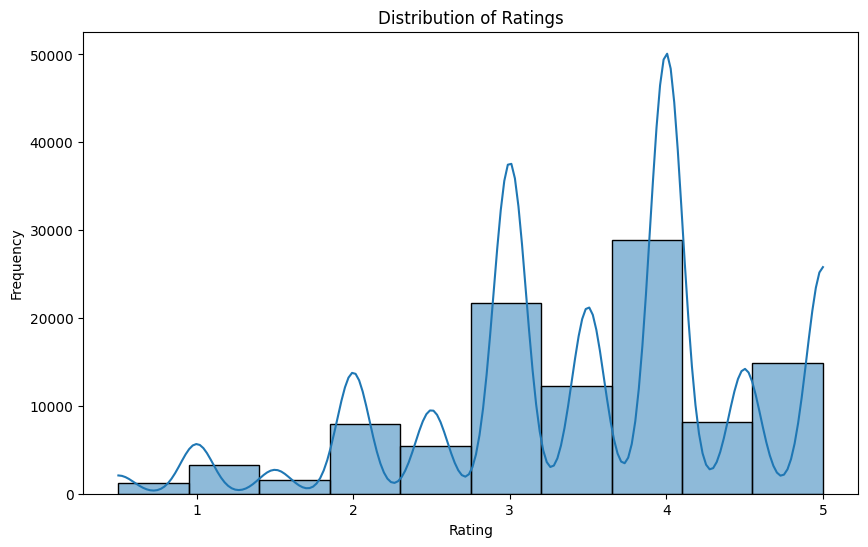

In [69]:
# Graphical representation of the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

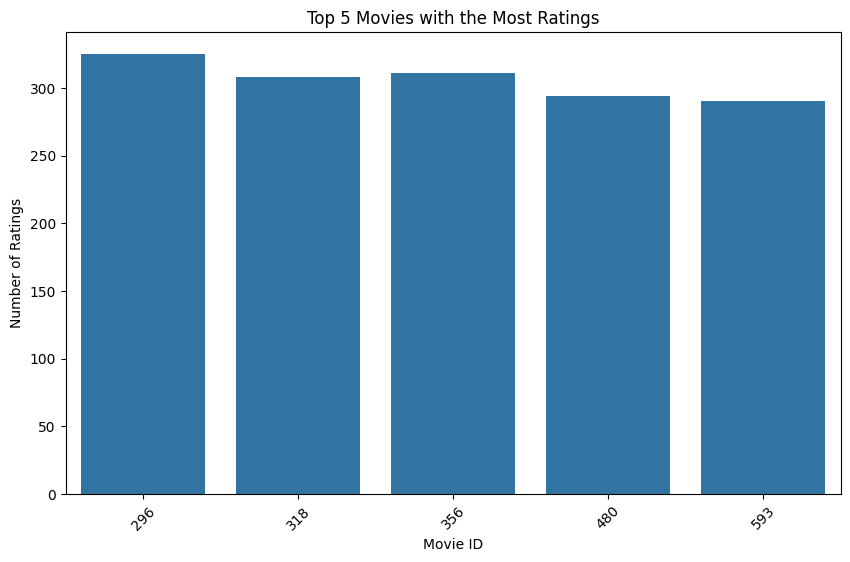

In [70]:
# top 5 movies with the most ratings graph
plt.figure(figsize=(10, 6))
top_5_movies = ratings['movieId'].value_counts().head(5)
sns.barplot(x=top_5_movies.index, y=top_5_movies.values)
plt.title('Top 5 Movies with the Most Ratings')
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()


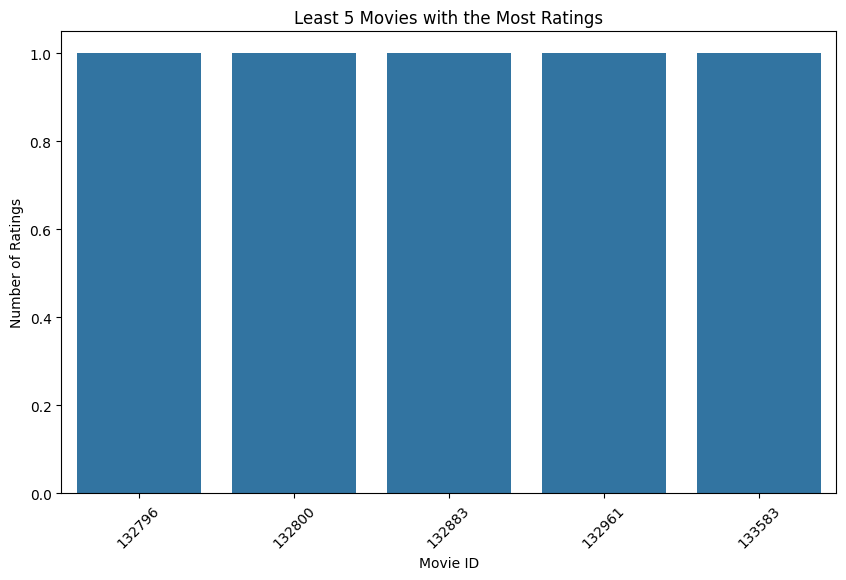

In [71]:
# least 5 movies with the most ratings graph
plt.figure(figsize=(10, 6))
least_5_movies = ratings['movieId'].value_counts().tail(5)
sns.barplot(x=least_5_movies.index, y=least_5_movies.values)
plt.title('Least 5 Movies with the Most Ratings')
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

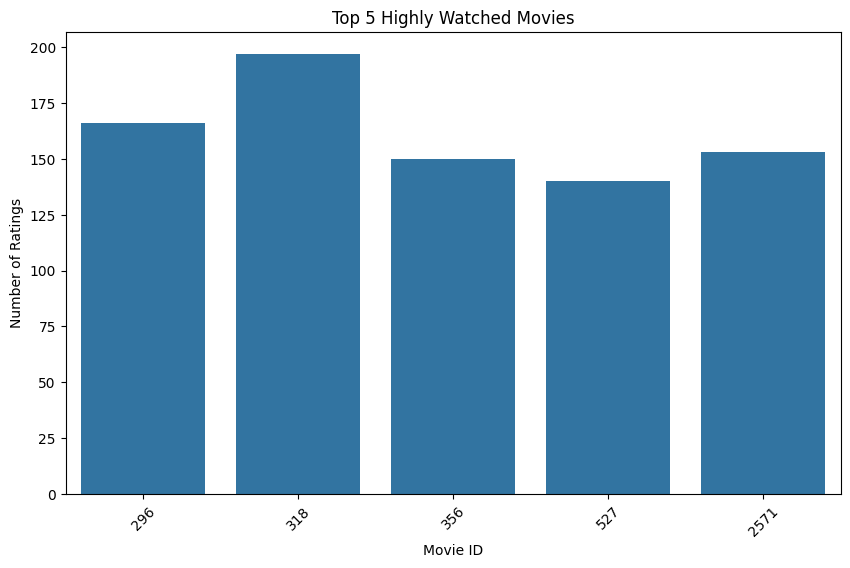

In [44]:
# top 5 highly watched movies graph
plt.figure(figsize=(10, 6))
top_5_highly_watched_movies = ratings[ratings['rating'] >= 4.5]['movieId'].value_counts().head(5)
sns.barplot(x=top_5_highly_watched_movies.index, y=top_5_highly_watched_movies.values)
plt.title('Top 5 Highly Watched Movies')
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()


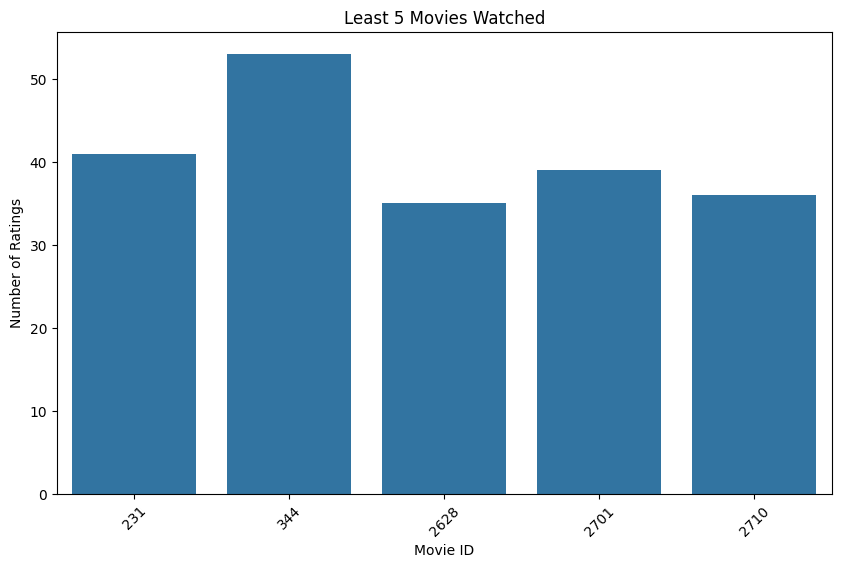

In [72]:
# least 5 movies watched graph
plt.figure(figsize=(10, 6))
least_5_low_rated_movies = ratings[ratings['rating'] <= 2.0]['movieId'].value_counts().head(5)
sns.barplot(x=least_5_low_rated_movies.index, y=least_5_low_rated_movies.values)
plt.title('Least 5 Movies Watched')
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

In [73]:
# Merge the two dataframes
movies_ratings = pd.merge(movies, ratings, on='movieId', how='inner')


In [74]:
movies_ratings.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

In [75]:
#save the merged dataframe to a new CSV file
movies_ratings.to_csv(r"C:\Users\dhars\OneDrive\Desktop\movieLensProject\movies_ratings.csv", index=False)